## Introduction:

### In this project , we will analyze the Indian Premier League (IPL) data and will visualize different Insights.

#### Indian Premier League(IPL) is an International T20 league  championship of cricket, which is held every year from March to May in India.This league has statrted in 2008 and after its 1st season, it has gained so much popularity and exposure that right now it is one of the best league championship in Cricket history. We have the data in .csv format which has been downloaded from Kaggle.


#### We have two dataset.One contains all the Match data for the last years, and the other contain all balls by balls data.

#### So without any delay, Let us load the data and start analyzing it.

In [1]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns


In [2]:
#for Visualization
from plotly import __version__
print ('plotly version: ', __version__ )# requires version >= 1.9.0
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.plotly as py
import plotly.graph_objs as go

plotly version:  3.6.1


In [3]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

In [4]:
#loading both the dataset
balls=pd.read_csv(r'C:\Users\Thor\Downloads\deliveries.csv')
match=pd.read_csv(r'C:\Users\Thor\Downloads\matches.csv')

match.head(7)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [5]:
balls.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
#Since the team names are long, for our analysing simplicity ,lets rename them in short format
match.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)
balls.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [7]:
match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [8]:

#Lets check the basic details from the match dataframe
print('Total Matches played',match.shape[0])
print('-'*44)
print('Total venues played at',match.venue.nunique())
print('-'*44)
print('the venues are', match.city.unique())

Total Matches played 636
--------------------------------------------
Total venues played at 35
--------------------------------------------
the venues are ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]


In [9]:
print('Maxm MOM Winner :',match.player_of_match.value_counts().idxmax()) #Maximum MOM awards

Maxm MOM Winner : CH Gayle


In [10]:
print('highest wins by a team is: ', match.winner.value_counts().idxmax(),'and they won', match.winner.value_counts()[0],'games') # team with highest wins

highest wins by a team is:  MI and they won 92 games


In [11]:
# The Best win margin for batting 1st
sd=match.iloc[[match['win_by_runs'].idxmax()]]
sd[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
43,2017,MI,DD,MI,146


In [12]:
# The Best win margin for batting 2nd
df=match.iloc[[match['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets']]

,season,team1,team2,winner,win_by_wickets
2,2017,GL,KKR,KKR,10


In [13]:
#Decision after toss
print('Toss decision \n',(match.toss_decision.value_counts())/577*100)

Toss decision 
 field    62.911612
bat      47.313692
Name: toss_decision, dtype: float64


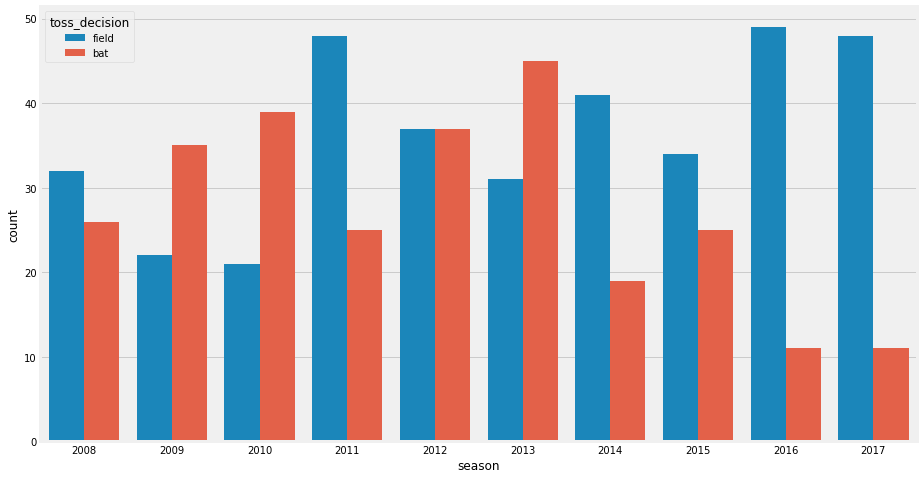

In [14]:
# Toss decision for every season
plt.subplots(figsize=(14,8))
sns.countplot(x='season',hue='toss_decision',data=match)
plt.show()

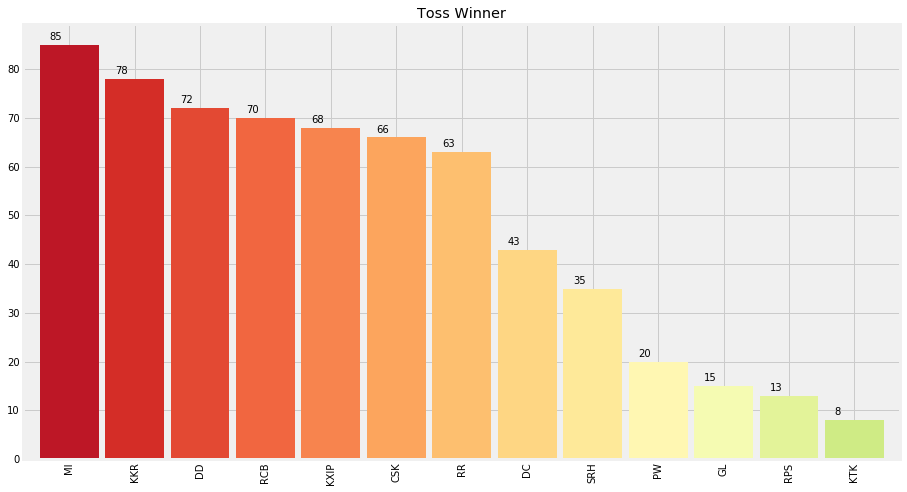

In [15]:
#maximum toss Winners
f,ax=plt.subplots(figsize=(14,8))
ax=match['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    ax.set_title('Toss Winner')
plt.show()

#print(match.groupby('toss_winner')['toss_winner'].count())


In [16]:
#Matches Played by teams
matches_played_by_teams=pd.concat([match['team1'],match['team2']])
matches_played_by_teams=matches_played_by_teams.value_counts().reset_index()
matches_played_by_teams.columns=['Team','Total Matches']
matches_played_by_teams.head()



,Team,Total Matches
0,MI,157
1,RCB,152
2,KKR,148
3,KXIP,148
4,DD,147


In [17]:
# Most wins by teams
wins=match['winner'].value_counts().reset_index()
wins.head()

,index,winner
0,MI,92
1,CSK,79
2,KKR,77
3,RCB,73
4,KXIP,70


In [18]:
# Details about the top performing teams
ty=pd.merge(matches_played_by_teams,wins,left_on='Team',right_on='index').drop(columns='index')
ty['Winning Percentage']=ty['winner']/ty['Total Matches']*100
ty.sort_values('winner',ascending=False)

,Team,Total Matches,winner,Winning Percentage
0,MI,157,92,58.598726
5,CSK,131,79,60.305344
2,KKR,148,77,52.027027
1,RCB,152,73,48.026316
3,KXIP,148,70,47.297297
6,RR,118,63,53.389831
4,DD,147,62,42.176871
7,SRH,76,42,55.263158
8,DC,75,29,38.666667
11,RPS,30,15,50.000000


In [19]:
# Vsual of the winning results of the teams
trace1=go.Bar(x=ty['Team'],
              y=ty['Total Matches'],
              name='Total Matches'
             )
trace2 = go.Bar(
    x=ty['Team'],
    y=ty['winner'],
    name='Matches Won'
)

data=[trace1,trace2]
layout=go.Layout(barmode='stack')

fig=go.Figure(data=data,layout=layout)
py.iplot(fig, filename='stacked-bar')


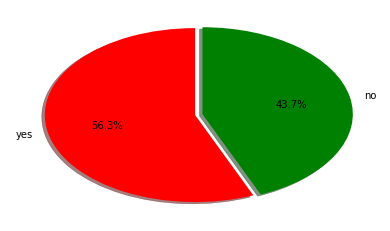

In [20]:
# How the toss winning luck has reflected in the results
df=match[match['toss_winner']==match['winner']]

slices=(len(df),(577-len(df)))
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['r','g'])
fig=plt.gcf()
plt.show()


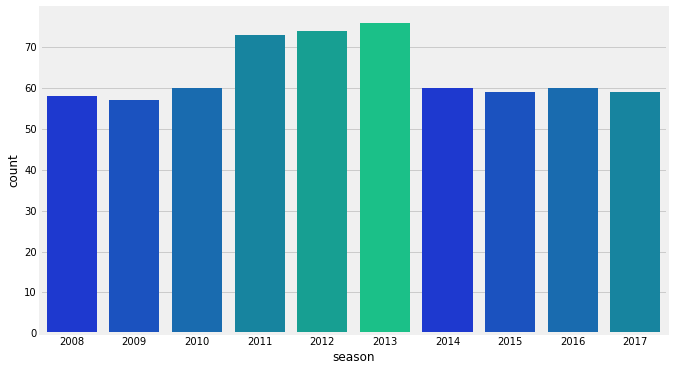

In [21]:
# no of matches per season

plt.subplots(figsize=(10,6))

sns.countplot(x='season',data=match,palette=sns.color_palette('winter'))

plt.show()


In [22]:
#Lets merge the datasets and start analysing further
batsmen=match[['id','season']].merge(balls,left_on='id',right_on='match_id',how='left').drop('id',axis=1)
batsmen.head(15)


,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,2017,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2017,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,2017,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,2017,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,2017,1,1,SRH,RCB,1,6,S Dhawan,DA Warner,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,2017,1,1,SRH,RCB,1,7,S Dhawan,DA Warner,TS Mills,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,2017,1,1,SRH,RCB,2,1,S Dhawan,DA Warner,A Choudhary,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,2017,1,1,SRH,RCB,2,2,DA Warner,S Dhawan,A Choudhary,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,2017,1,1,SRH,RCB,2,3,DA Warner,S Dhawan,A Choudhary,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [23]:
# The best batsman in IPL over the years
xx=batsmen.groupby('batsman')['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False).head()
xx

,batsman,batsman_runs
374,SK Raina,4548
431,V Kohli,4423
323,RG Sharma,4207
137,G Gambhir,4132
103,DA Warner,4014


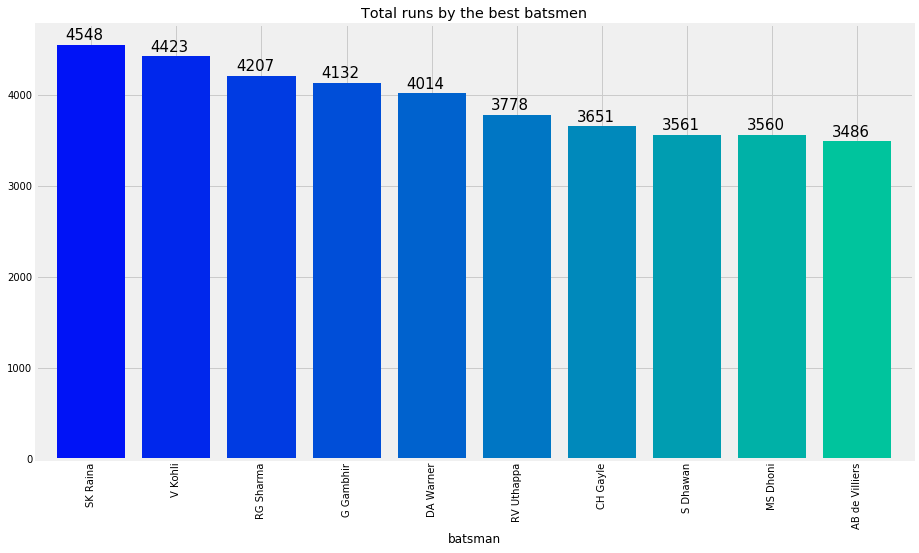

In [24]:
# Visualization of the runs made by the best batsman
plt.subplots(figsize=(14,8))
max_runs=balls.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter',12))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.title('Total runs by the best batsmen')
plt.show()


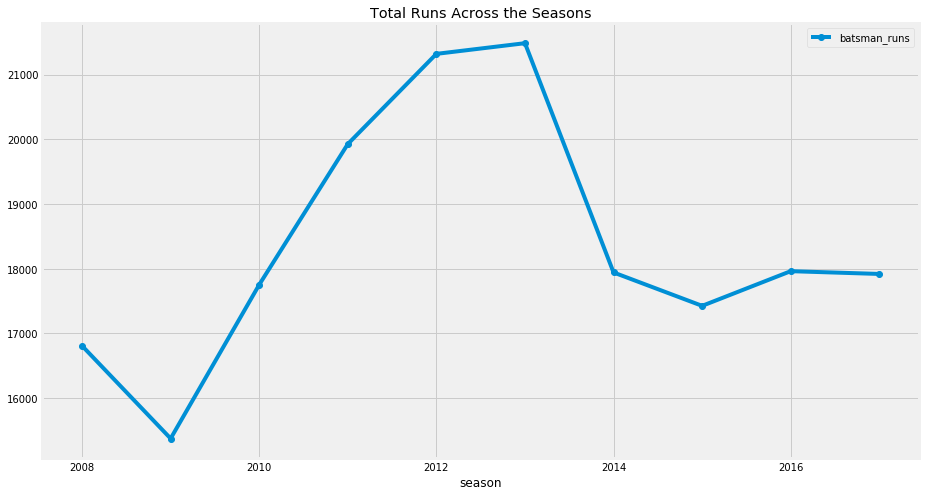

In [25]:
season=batsmen.groupby('season')['batsman_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(14,8)
plt.title('Total Runs Across the Seasons')
plt.show()

In [26]:
#no of sixes per season
boundaries=batsmen.groupby('season')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
boundaries.head()

,season,batsman_runs
0,2008,623
1,2009,508
2,2010,587
3,2011,639
4,2012,733


In [27]:
#no o 4's per season
a=batsmen.groupby('season')['batsman_runs'].agg(lambda x:(x==4).sum()).reset_index()
a

,season,batsman_runs
0,2008,1703
1,2009,1321
2,2010,1709
3,2011,1916
4,2012,1911
5,2013,2054
6,2014,1563
7,2015,1611
8,2016,1633
9,2017,1612


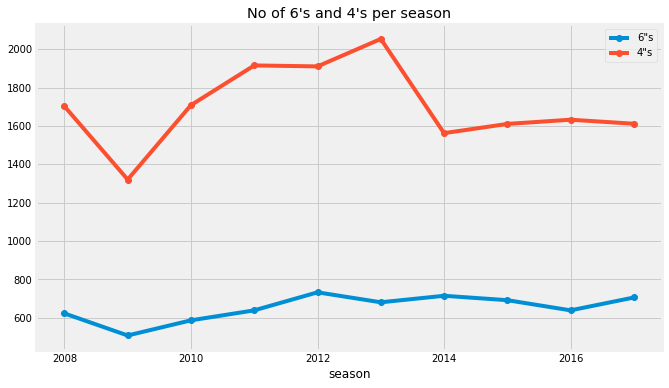

In [28]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title("No of 6's and 4's per season")
plt.show()

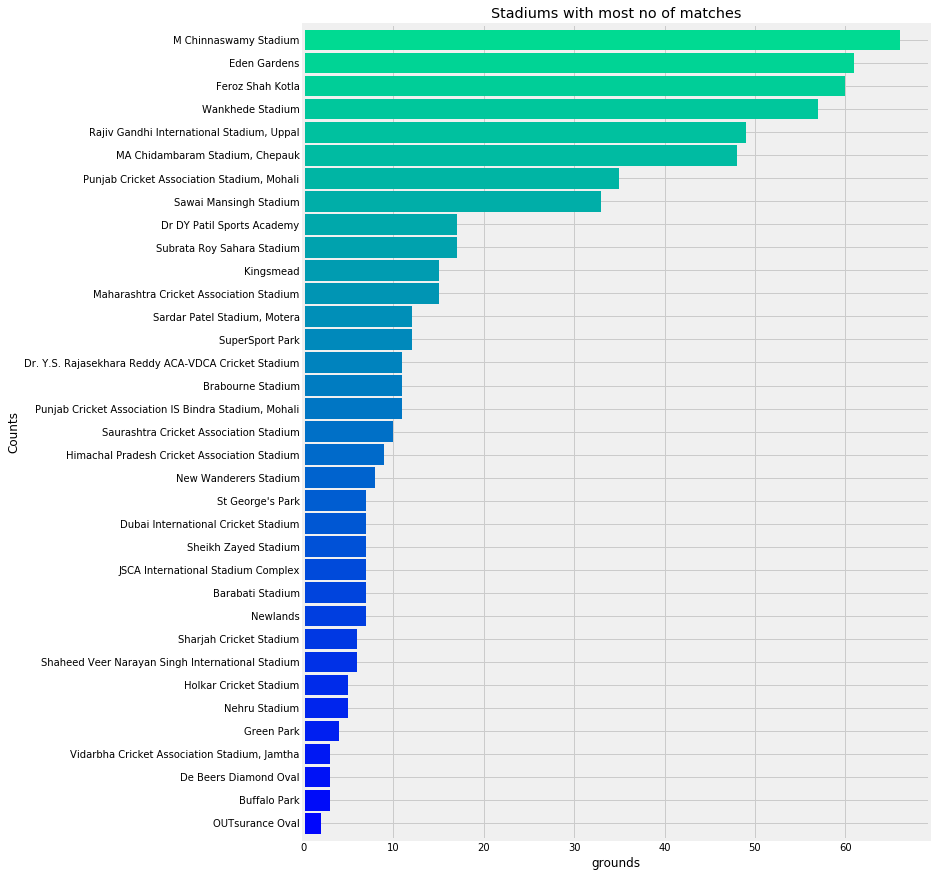

In [29]:
#The venues with the most matches
plt.subplots(figsize=(10,15))
ax=match['venue'].value_counts().sort_values().plot.barh(width=0.9,color=sns.color_palette('winter',40))
ax.set_xlabel('grounds')
ax.set_ylabel('Counts')
plt.title('Stadiums with most no of matches')
plt.show()

In [30]:
# Winner of the league year-by year
print('Winners By Years')
for i in range(2008,2017):
    dfo=((match[match['season']==i]).iloc[-1]) 
    print(dfo[['season','winner']].values)

Winners By Years
[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']


In [31]:
toppers=balls.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
toppers.head()

batsman_runs,0,1,2,3,4,5,6
batsman,,,,,,,
A Ashish Reddy,61.0,83.0,20.0,1.0,16.0,NaN,15.0
A Chandila,3.0,4.0,NaN,NaN,NaN,NaN,NaN
A Chopra,45.0,21.0,2.0,NaN,7.0,NaN,NaN
A Choudhary,4.0,13.0,1.0,NaN,1.0,NaN,1.0
A Flintoff,24.0,23.0,2.0,1.0,5.0,NaN,2.0


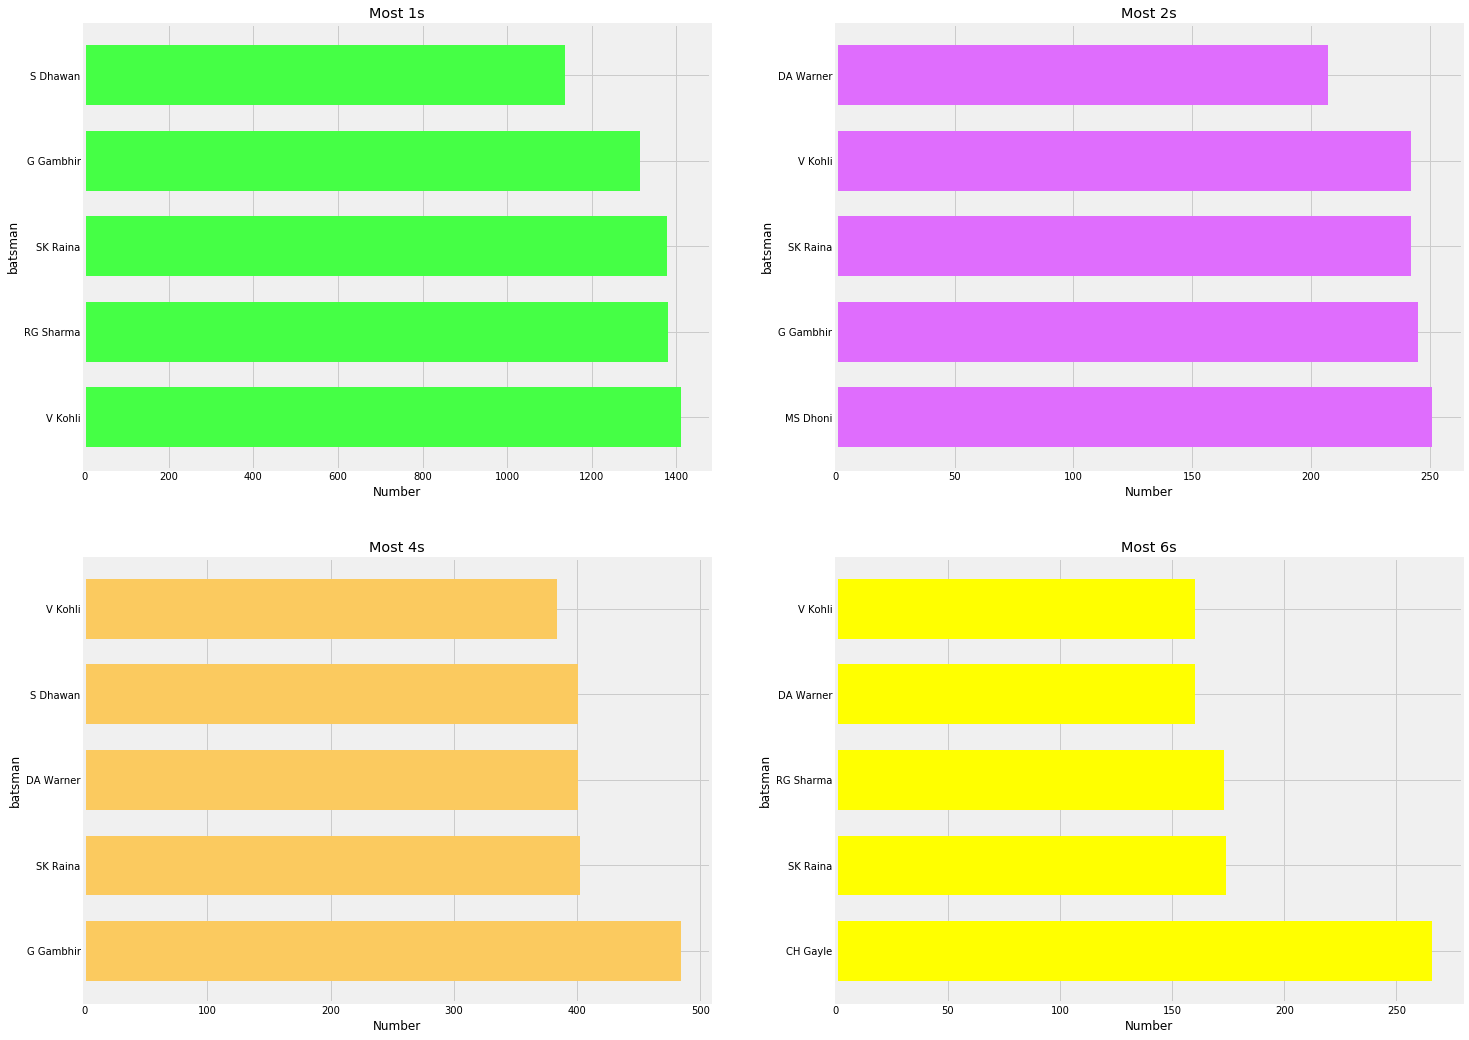

In [32]:
#Batsman shot analysis
fig,ax=plt.subplots(2,2,figsize=(22,18))

toppers[1].sort_values(ascending=False)[:5].plot.barh(width=0.7,ax=ax[0,0],color='#45ff45')
ax[0,0].set_title('Most 1s')
ax[0,0].set_xlabel('Number')
toppers[2].sort_values(ascending=False)[:5].plot.barh(width=0.7,ax=ax[0,1],color='#df6dfd')
ax[0,1].set_title('Most 2s')
ax[0,1].set_xlabel('Number')
toppers[4].sort_values(ascending=False)[:5].plot.barh(width=0.7,ax=ax[1,0],color='#fbca5f')
ax[1,0].set_title('Most 4s')
ax[1,0].set_xlabel('Number')
toppers[6].sort_values(ascending=False)[:5].plot.barh(width=0.7,ax=ax[1,1],color='#ffff00')
ax[1,1].set_title('Most 6s')
ax[1,1].set_xlabel('Number')
plt.show()

In [33]:
# Most runs scored in 1st and 2nd innings
xyz=balls.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
xyz.drop('match_id',axis=1,inplace=True)
xyz.head(2)

,inning,batting_team,total_runs
0,1,SRH,207
1,2,RCB,172


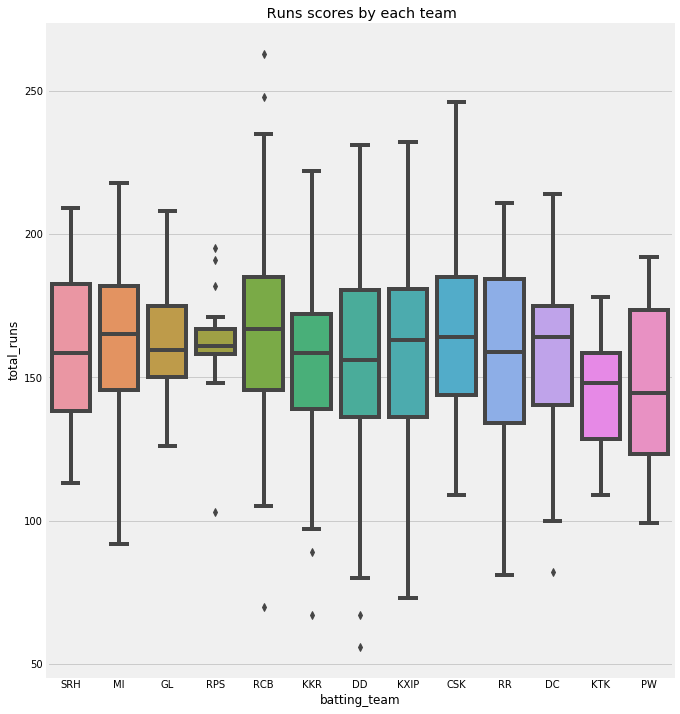

In [34]:
plt.subplots(figsize=(10,12))
score1=xyz[xyz['inning']==1]
score2=xyz[xyz['inning']==2]

sns.boxplot(x='batting_team',y='total_runs',data=score1)
plt.title(' Runs scores by each team')
plt.show()

### MAHENDRA SINGH DHONI:

#### The analysis will be incomplete if I dont dig and play around with the data we have of india's favourite son, Captain Cool M S Dhoni. B-)

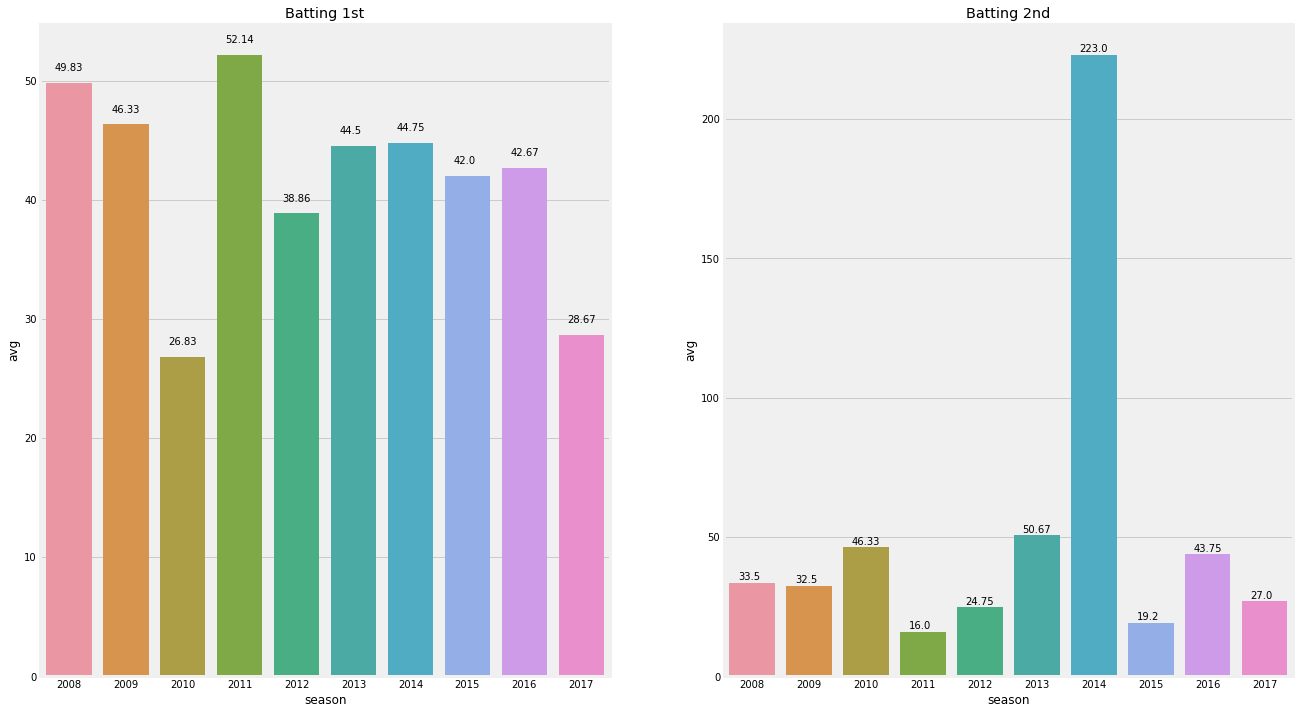

In [35]:
Dhoni=batsmen[batsmen['batsman']=='MS Dhoni']
Dhoni1=Dhoni.groupby(['season','inning'])['total_runs'].sum().reset_index()
x=Dhoni[Dhoni['player_dismissed']=='MS Dhoni'].reset_index()
y=x.groupby(['season','inning'])['player_dismissed'].count().reset_index()
y.columns=['ssn','ing','player_dismissed']
DHONI=pd.concat([Dhoni1,y],axis=1).reset_index()
DHONI['avg']=round(DHONI['total_runs']/DHONI['player_dismissed'],2)
DHONI.drop(columns=['index','ssn','ing'],axis=1,inplace=True)
DHONI_1st=DHONI[DHONI['inning']==1]
DHONI_2nd=DHONI[DHONI['inning']==2]
fig,ax=plt.subplots(1,2,figsize=(20,12))
plt.title("MS Dhoni's Batting Average")
bx=sns.barplot(x='season',y='avg',data=DHONI_1st,ax=ax[0],orient='v')
cx=sns.barplot(x='season',y='avg',data=DHONI_2nd,ax=ax[1],orient='v')



for p in bx.patches:
    bx.annotate(format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))

for p in cx.patches:
    cx.annotate(format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
bx.set_title('Batting 1st')
cx.set_title('Batting 2nd')


plt.show()

In [36]:
#Pulling all the data for MS Dhoni
Dhoni=batsmen[batsmen['batsman']=='MS Dhoni']
Dhoni

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
469,2017,2,2,RPS,MI,16,4,MS Dhoni,SPD Smith,HH Pandya,...,0,0,0,0,1,0,1,NaN,NaN,NaN
473,2017,2,2,RPS,MI,17,2,MS Dhoni,SPD Smith,JJ Bumrah,...,0,0,0,0,1,0,1,NaN,NaN,NaN
478,2017,2,2,RPS,MI,18,1,MS Dhoni,SPD Smith,MJ McClenaghan,...,0,0,0,0,0,0,0,NaN,NaN,NaN
479,2017,2,2,RPS,MI,18,2,MS Dhoni,SPD Smith,MJ McClenaghan,...,0,0,0,0,1,0,1,NaN,NaN,NaN
482,2017,2,2,RPS,MI,18,5,MS Dhoni,SPD Smith,MJ McClenaghan,...,0,0,0,0,1,0,1,NaN,NaN,NaN
484,2017,2,2,RPS,MI,19,1,MS Dhoni,SPD Smith,JJ Bumrah,...,0,0,0,0,1,0,1,NaN,NaN,NaN
486,2017,2,2,RPS,MI,19,3,MS Dhoni,SPD Smith,JJ Bumrah,...,0,0,0,0,0,0,0,NaN,NaN,NaN
487,2017,2,2,RPS,MI,19,4,MS Dhoni,SPD Smith,JJ Bumrah,...,0,0,0,0,0,0,0,NaN,NaN,NaN
488,2017,2,2,RPS,MI,19,5,MS Dhoni,SPD Smith,JJ Bumrah,...,0,0,0,0,4,0,4,NaN,NaN,NaN
489,2017,2,2,RPS,MI,19,6,MS Dhoni,SPD Smith,JJ Bumrah,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [37]:
# The detailed data about MSD
DHONI=pd.concat([Dhoni1,y],axis=1).reset_index()
DHONI

,index,season,inning,total_runs,ssn,ing,player_dismissed
0,0,2008,1,299,2008,1,6
1,1,2008,2,134,2008,2,4
2,2,2009,1,278,2009,1,6
3,3,2009,2,65,2009,2,2
4,4,2010,1,161,2010,1,6
5,5,2010,2,139,2010,2,3
6,6,2011,1,365,2011,1,7
7,7,2011,2,32,2011,2,2
8,8,2012,1,272,2012,1,7
9,9,2012,2,99,2012,2,4


In [38]:
DHONI['avg']=round(DHONI['total_runs']/DHONI['player_dismissed'],2)
DHONI.drop(columns=['index','ssn','ing'],axis=1,inplace=True)
DHONI.head(8)

,season,inning,total_runs,player_dismissed,avg
0,2008,1,299,6,49.83
1,2008,2,134,4,33.50
2,2009,1,278,6,46.33
3,2009,2,65,2,32.50
4,2010,1,161,6,26.83
5,2010,2,139,3,46.33
6,2011,1,365,7,52.14
7,2011,2,32,2,16.00


In [39]:
#Dismissal of MSD over the years
dhoni2=Dhoni.groupby(['season','dismissal_kind'])['match_id'].count().reset_index()
dhoni2.columns=['season','dismissal_kind','no_of_times']
dhoni2.head(12)

,season,dismissal_kind,no_of_times
0,2008,caught,9
1,2008,lbw,1
2,2008,run out,1
3,2009,bowled,2
4,2009,caught,5
5,2009,caught and bowled,1
6,2010,bowled,2
7,2010,caught,5
8,2010,caught and bowled,1
9,2010,run out,1


In [40]:
# How dhoni got out every year
dhoni2.groupby('dismissal_kind')['no_of_times'].sum()

dismissal_kind
bowled               12
caught               65
caught and bowled     4
lbw                   3
run out              18
stumped               3
Name: no_of_times, dtype: int64

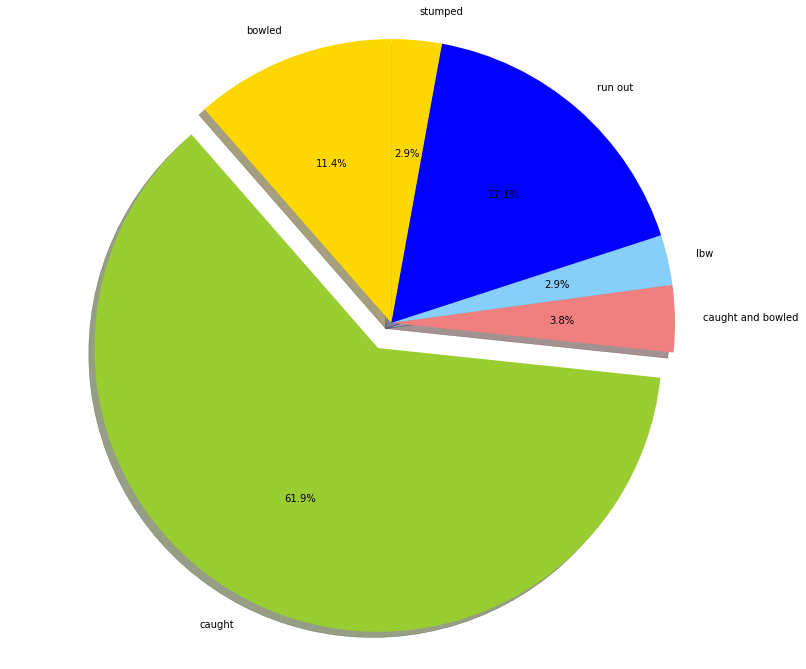

In [41]:
# Data to plot
plt.subplots(figsize=(12,12))
labels = 'bowled','caught','caught and bowled','lbw','run out','stumped'
sizes = dhoni2.groupby('dismissal_kind')['no_of_times'].sum()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue']
explode = (0, 0.1, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

# IPl Batsman innings wise average:

#### We can analyse the batting statistics of any batsman by making a function of the code that we used to analyse dhoni's batting stats 

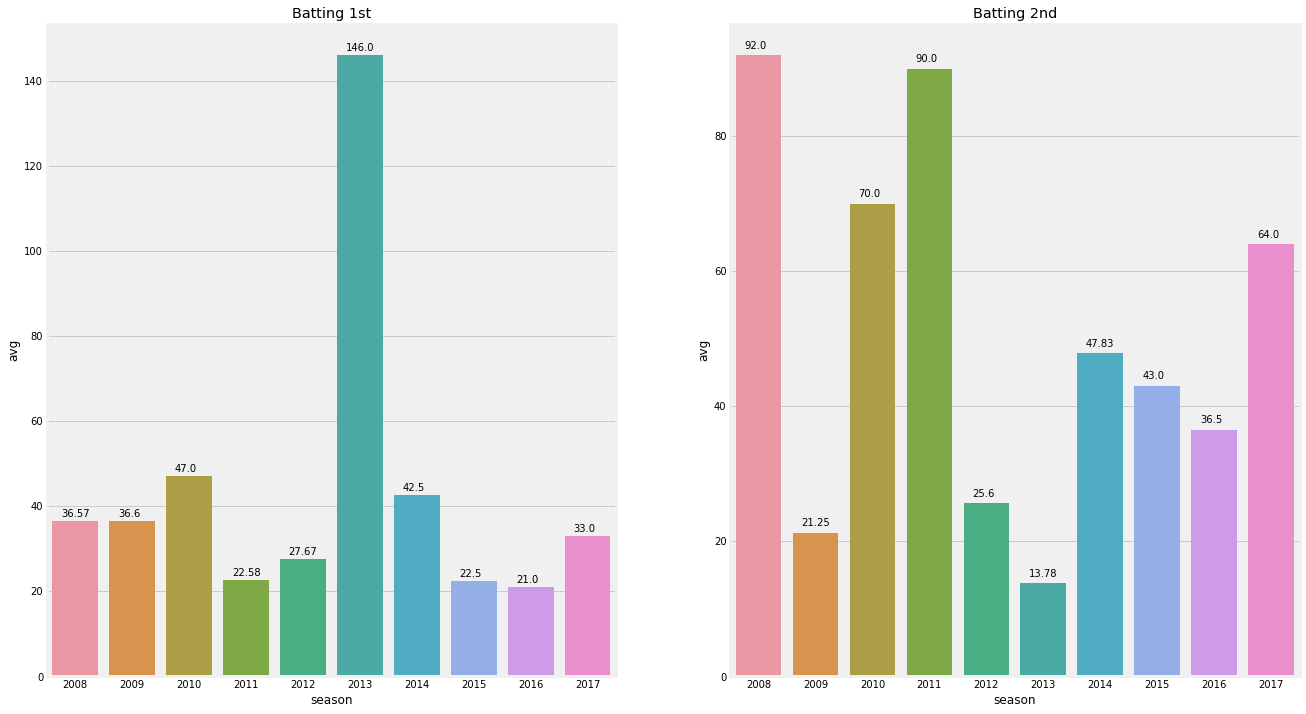

In [42]:

def player(player1):
    Dhoni=batsmen[batsmen['batsman']==player1]
    Dhoni1=Dhoni.groupby(['season','inning'])['total_runs'].sum().reset_index()
    x=Dhoni[Dhoni['player_dismissed']==player1].reset_index()
    y=x.groupby(['season','inning'])['player_dismissed'].count().reset_index()
    y.columns=['ssn','ing','player_dismissed']
    DHONI=pd.concat([Dhoni1,y],axis=1).reset_index()
    DHONI['avg']=round(DHONI['total_runs']/DHONI['player_dismissed'],2)
    DHONI.drop(columns=['index','ssn','ing'],axis=1,inplace=True)
    DHONI_1st=DHONI[DHONI['inning']==1]
    DHONI_2nd=DHONI[DHONI['inning']==2]
    fig,ax=plt.subplots(1,2,figsize=(20,12))
    fig=plt.gcf()
    bx=sns.barplot(x='season',y='avg',data=DHONI_1st,ax=ax[0])
    cx=sns.barplot(x='season',y='avg',data=DHONI_2nd,ax=ax[1])


    for p in bx.patches:
        bx.annotate(format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
    for p in cx.patches:
        cx.annotate(format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
    bx.set_title('Batting 1st')
    cx.set_title('Batting 2nd')
    plt.show()
    
     
player('SK Raina')

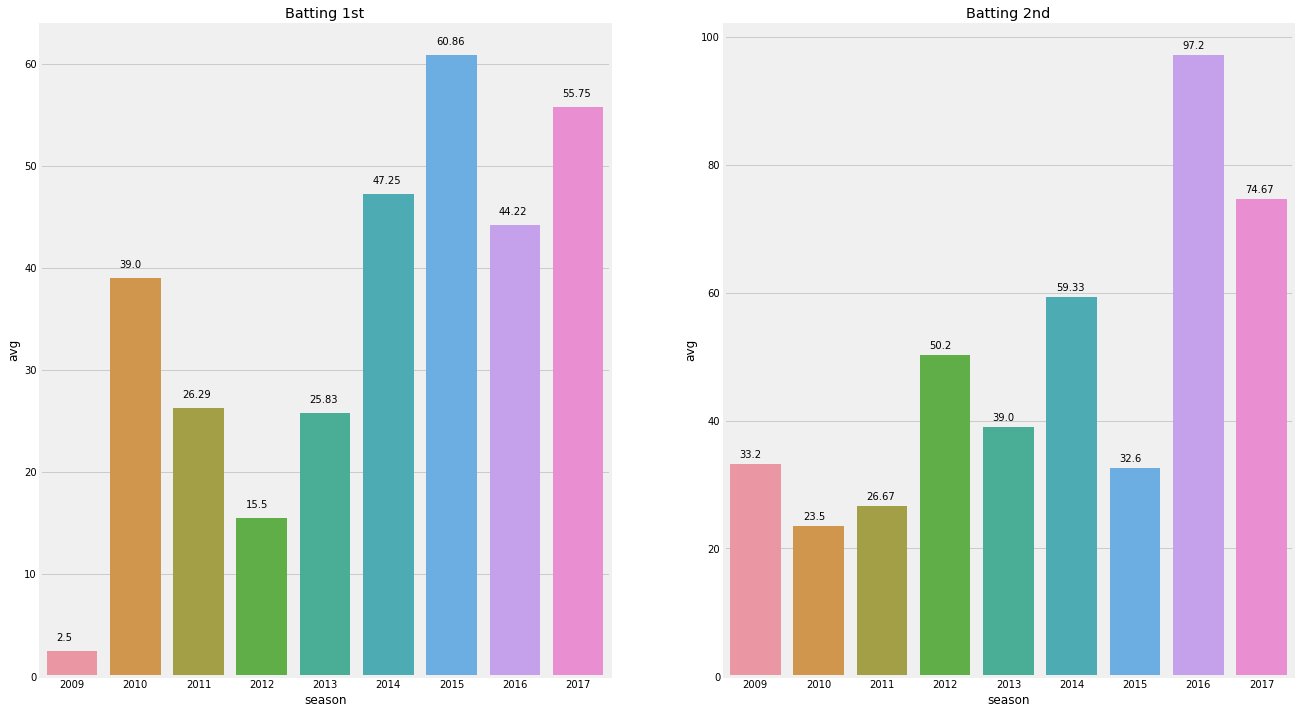

In [43]:
player('DA Warner')

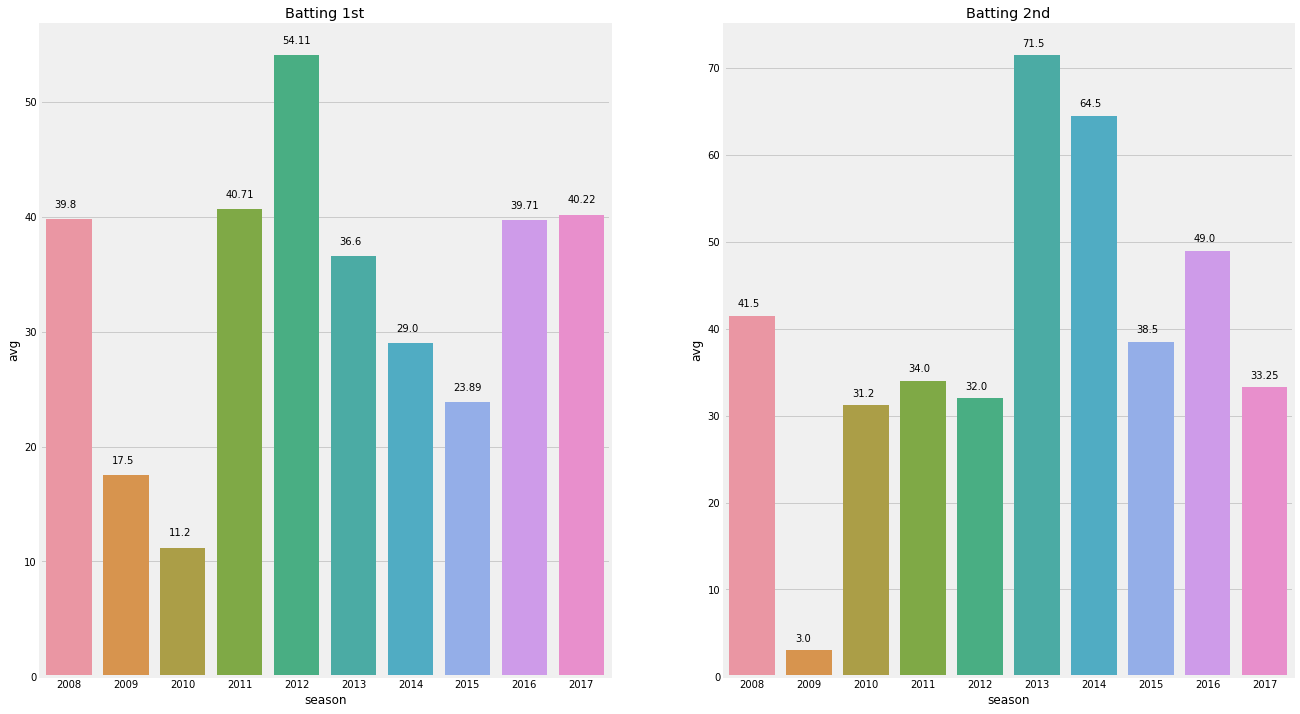

In [44]:
player('S Dhawan')

### No of 4s and 6s by each team over the years

In [55]:
ax=balls[balls['batsman_runs']==6].batting_team.value_counts().reset_index()
ax2=balls[balls['batsman_runs']==4].batting_team.value_counts().reset_index()
ax=ax.merge(ax2,left_on='index',right_on='index',how='left')
ax.rename({'index':'team','batting_team_x':"6's",'batting_team_y':"4's"},axis=1,inplace=True)

trace1 = go.Bar(
    x=ax.team.values, y=ax["6's"],
    name="6's",
    orientation = 'v',
    marker = dict(color = 'rgba(64,12,28, 0.6)',
        line = dict(color = 'rgba(64,12,28, 0.6)',
            width = 3)
    )
)
trace2 = go.Bar(
    x=ax.team.values, y=ax["4's"],
    name="4's",
    orientation = 'v',
    marker = dict(color = 'rgba(9,196,56, 0.7)',
        line = dict(color = 'rgba(9, 126, 56, 1.0)',
            width = 3)
    )
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')




# Conclusion:


#### After the analysis, the below are the insights we can draw from it .

-  Till now(2017) 636 matches has been played in total 36 venues.
-  Chris Gayle has been adjudged Most Man of the match award
-  Mumbai Indians have won maximum no of matches(92)
-  The match won with best margin by batting first was Mumbai Indians who beat Delhi Daredevils by 146 runs in 2017
-  The match won with best margin by bowling first was KKR  who beat Gujrat Lions by 10 wickets in 2017
-  62.91% of times teams after winning toss have chosen fielding.
-  The trend to field 1st after winning toss has been increased over the last few years.
-  Mumbai Indians are the luckiest team, considering the fact that they won the toss most.
-  Mumbai indians has also played most no of matches
-  56.3% of the the team who won the toss, has also won the match
-  Suresh Raina is the best batsman with hghest no of runs, followed by Virat Kohli and Rohit Sharma
-  M chinnaswamy stadium has hosted most no of matches
-  Chris Gayle has hit most no of 6s,while Gautam Gambhir has hit most 4s
-  Delhi daredevils has scored the lowest score and CSK have the highest in in the history of the league
-  Dhoni has a better batting average while batting first,instead of 2nd
-  Dhoni had a humongous average of 223 by batting 2nd in the season 2014.
-  Most dismssal of dhoni was by getting caught, which equals to almost 62% of the time.
-  Suresh Raina has a better average,batting second , which incudes averages of 92 in 2008,90 in 2011, and 64 in 2017
-  Mumbai indians have hit most fours in the entire IPL, while RCB has the most sixes(guess why? Universe boss Chris Gayle!!)

#### With this, I will be concluding my analysis on this IPL data. We can still dig more and gain more meaningful and awesome insights. I will keep updating this kernal in future.If you have come this far with me , I sincerely thank you for the read. Happy Coding.
